# 3.5 图像分类数据集（Fashion-MNIST）

In [0]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import time
import sys
sys.path.append("..") # 为了导入上层目录的d2lzh_pytorch
import d2lzh_pytorch as d2l

print(torch.__version__)
print(torchvision.__version__)

## 3.5.1 获取数据集

In [7]:
mnist_train = torchvision.datasets.FashionMNIST(root='D:/深度学习资料/Dive-into-DL-PyTorch-master/data', train=True, download=True, transform=transforms.ToTensor())
mnist_test = torchvision.datasets.FashionMNIST(root='D:/深度学习资料/Dive-into-DL-PyTorch-master/data', train=False, download=True, transform=transforms.ToTensor())

Using downloaded and verified file: D:/深度学习资料/Dive-into-DL-PyTorch-master/data\FashionMNIST\raw\train-images-idx3-ubyte.gz
Extracting D:/深度学习资料/Dive-into-DL-PyTorch-master/data\FashionMNIST\raw\train-images-idx3-ubyte.gz to D:/深度学习资料/Dive-into-DL-PyTorch-master/data\FashionMNIST\raw
Using downloaded and verified file: D:/深度学习资料/Dive-into-DL-PyTorch-master/data\FashionMNIST\raw\train-labels-idx1-ubyte.gz
Extracting D:/深度学习资料/Dive-into-DL-PyTorch-master/data\FashionMNIST\raw\train-labels-idx1-ubyte.gz to D:/深度学习资料/Dive-into-DL-PyTorch-master/data\FashionMNIST\raw
Using downloaded and verified file: D:/深度学习资料/Dive-into-DL-PyTorch-master/data\FashionMNIST\raw\t10k-images-idx3-ubyte.gz
Extracting D:/深度学习资料/Dive-into-DL-PyTorch-master/data\FashionMNIST\raw\t10k-images-idx3-ubyte.gz to D:/深度学习资料/Dive-into-DL-PyTorch-master/data\FashionMNIST\raw
Using downloaded and verified file: D:/深度学习资料/Dive-into-DL-PyTorch-master/data\FashionMNIST\raw\t10k-labels-idx1-ubyte.gz
Extracting D:/深度学习资料/Dive-in

In [8]:
print(type(mnist_train))
print(len(mnist_train), len(mnist_test))

<class 'torchvision.datasets.mnist.FashionMNIST'>
6000010000


In [9]:
feature, label = mnist_train[0]
print(feature.shape, feature.dtype)  # Channel x Height X Width
print(label)

torch.Size([1, 28, 28])torch.float32
9


In [10]:
mnist_PIL = torchvision.datasets.FashionMNIST(root='D:/深度学习资料/Dive-into-DL-PyTorch-master/data', train=True, download=True)
PIL_feature, label = mnist_PIL[0]
print(PIL_feature)

<PIL.Image.Image image mode=L size=28x28 at 0x1A72E1F5278>


In [11]:
# 本函数已保存在d2lzh包中方便以后使用
def get_fashion_mnist_labels(labels):
    text_labels = ['t-shirt', 'trouser', 'pullover', 'dress', 'coat',
                   'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']
    return [text_labels[int(i)] for i in labels]

In [12]:
# 本函数已保存在d2lzh包中方便以后使用
def show_fashion_mnist(images, labels):
    d2l.use_svg_display()
    # 这里的_表示我们忽略（不使用）的变量
    _, figs = plt.subplots(1, len(images), figsize=(12, 12))
    for f, img, lbl in zip(figs, images, labels):
        f.imshow(img.view((28, 28)).numpy())
        f.set_title(lbl)
        f.axes.get_xaxis().set_visible(False)
        f.axes.get_yaxis().set_visible(False)
    plt.show()

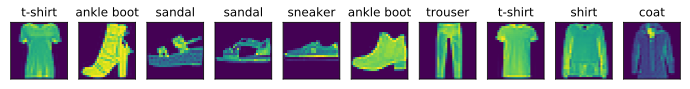

In [14]:
X, y = [], []
for i in range(10, 20):
    X.append(mnist_train[i][0])
    y.append(mnist_train[i][1])
show_fashion_mnist(X, get_fashion_mnist_labels(y))

## 3.5.2 读取小批量

In [15]:
batch_size = 256
if sys.platform.startswith('win'):
    num_workers = 0  # 0表示不用额外的进程来加速读取数据
else:
    num_workers = 4
train_iter = torch.utils.data.DataLoader(mnist_train, batch_size=batch_size, shuffle=True, num_workers=num_workers)
test_iter = torch.utils.data.DataLoader(mnist_test, batch_size=batch_size, shuffle=False, num_workers=num_workers)

In [17]:
start = time.time()
for X, y in train_iter:
    continue
print('%.2f sec' % (time.time() - start))

5.78 sec
